#[실전예제]헬스케어 - 질병 데이터분석 '코로나 바이러스'

#코로나 바이러스 데이터 분석 - 환경 설정 및 데이터 구조 파악


##1. 라이브러리 import 및 데이터 업로드

###라이브러리 import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import folium # 지도 시각화
import os

###csv 파일 업로드

In [4]:
# from google.colab import files
# uploaded = files.upload()

os.environ['KAGGLE_USERNAME'] = "hwankihan"
os.environ['KAGGLE_KEY'] = "bf2898a338529cdfeb184d116e2cd40f"

In [5]:
!kaggle datasets download -d ashudata/covid19dataset
!unzip '*.zip'

  0% 0.00/1.17M [00:00<?, ?B/s]
100% 1.17M/1.17M [00:00<00:00, 38.9MB/s]
Archive:  covid19dataset.zip
  inflating: COVID_Data.csv          
  inflating: COVID_Data_Basic.csv    


## 2. 데이터 구조 파악하기

###데이터 pandas로 불러오기

In [11]:
coronaDF = pd.read_csv("COVID_Data_Basic.csv")

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
0,1,Afghanistan,2019-12-31,0,0,0,0,0,0
1,2,Afghanistan,2020-01-01,0,0,0,0,0,0
2,3,Afghanistan,2020-01-02,0,0,0,0,0,0
3,4,Afghanistan,2020-01-03,0,0,0,0,0,0
4,5,Afghanistan,2020-01-04,0,0,0,0,0,0


###데이터 확인하기

In [13]:
coronaDF

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
0,1,Afghanistan,2019-12-31,0,0,0,0,0,0
1,2,Afghanistan,2020-01-01,0,0,0,0,0,0
2,3,Afghanistan,2020-01-02,0,0,0,0,0,0
3,4,Afghanistan,2020-01-03,0,0,0,0,0,0
4,5,Afghanistan,2020-01-04,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
54517,55096,Zimbabwe,2020-11-02,8389,245,7939,15,2,12
54518,55097,Zimbabwe,2020-11-03,8410,246,7942,21,1,3
54519,55098,Zimbabwe,2020-11-04,8427,248,7967,17,2,25
54520,55099,Zimbabwe,2020-11-05,8444,248,7975,17,0,8


###결측 값 확인

In [12]:
coronaDF.isnull().sum()

Unnamed: 0      0
Country         0
Date            0
Confirmed       0
Death           0
Recovered       0
newConfirmed    0
newDeath        0
newRecovered    0
dtype: int64

### 데이터 타입 조회

In [15]:
coronaDF.info()
# 날짜가 object로 되어있음 -> date형식으로 바꾸기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54522 entries, 0 to 54521
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    54522 non-null  int64 
 1   Country       54522 non-null  object
 2   Date          54522 non-null  object
 3   Confirmed     54522 non-null  int64 
 4   Death         54522 non-null  int64 
 5   Recovered     54522 non-null  int64 
 6   newConfirmed  54522 non-null  int64 
 7   newDeath      54522 non-null  int64 
 8   newRecovered  54522 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.7+ MB


### Date 정보 수정 (Object => datetime)

In [18]:
coronaDF['Date'] = pd.to_datetime(coronaDF['Date'])
coronaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54522 entries, 0 to 54521
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    54522 non-null  int64         
 1   Country       54522 non-null  object        
 2   Date          54522 non-null  datetime64[ns]
 3   Confirmed     54522 non-null  int64         
 4   Death         54522 non-null  int64         
 5   Recovered     54522 non-null  int64         
 6   newConfirmed  54522 non-null  int64         
 7   newDeath      54522 non-null  int64         
 8   newRecovered  54522 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 3.7+ MB


# 코로나 바이러스 데이터 분석 - 국가별 최신 확진자, 사망자, 회복자 데이터 분석



### 최신 데이터만 남기기

In [19]:
latestDF = coronaDF[coronaDF['Date'] == max(coronaDF['Date'])]
latestDF

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
10673,29010,Afghanistan,2020-11-06,41975,1554,34440,40,0,0
10905,58010,Albania,2020-11-06,23210,549,11861,489,6,165
11137,87010,Algeria,2020-11-06,60800,2024,41510,631,13,266
11369,11601,Andorra,2020-11-06,5135,75,3858,0,0,0
11601,14501,Angola,2020-11-06,12223,300,5626,121,1,276
...,...,...,...,...,...,...,...,...,...
53593,53940,West Bank and Gaza,2020-11-06,57226,511,49537,554,3,857
53825,54230,Western Sahara,2020-11-06,10,1,8,0,0,0
54057,54520,Yemen,2020-11-06,2067,602,1375,4,1,0
54289,54810,Zambia,2020-11-06,16819,349,15862,49,0,35


### 국가별 합계 구하기

In [21]:
latest_country_sum = latestDF.groupby('Country')['Confirmed', 'Death', 'Recovered'].sum().reset_index()
latest_country_sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country,Confirmed,Death,Recovered
0,Afghanistan,41975,1554,34440
1,Albania,23210,549,11861
2,Algeria,60800,2024,41510
3,Andorra,5135,75,3858
4,Angola,12223,300,5626
...,...,...,...,...
185,West Bank and Gaza,57226,511,49537
186,Western Sahara,10,1,8
187,Yemen,2067,602,1375
188,Zambia,16819,349,15862


### 확진자 높은 국가순으로 정렬하기

In [24]:
latest_country_sum=latest_country_sum.sort_values(by = 'Confirmed', ascending=False).reset_index(drop=True)
latest_country_sum

,Country,Confirmed,Death,Recovered
0,US,9733816,236073,3810791
1,India,8462080,125562,7819886
2,Brazil,5631181,162015,5118156
3,Russia,1720063,29654,1288096
4,France,1709716,39916,131810
...,...,...,...,...
185,Saint Kitts and Nevis,19,0,19
186,Solomon Islands,13,0,4
187,Western Sahara,10,1,8
188,MS Zaandam,9,2,0


### 데이터 전체 조회하기


In [26]:
latest_country_sum.style.background_gradient(cmap='Reds')

,Country,Confirmed,Death,Recovered
0,US,9733816,236073,3810791
1,India,8462080,125562,7819886
2,Brazil,5631181,162015,5118156
3,Russia,1720063,29654,1288096
4,France,1709716,39916,131810
5,Spain,1328832,38833,150376
6,Argentina,1228814,33136,1042237
7,United Kingdom,1149791,48565,2951
8,Colombia,1127733,32405,1020263
9,Mexico,955128,94323,812556


# 코로나 바이러스 데이터 분석 - 시간에 따른 확진자, 사망자, 회복자 시각화

###날짜별 확진자, 사망자, 회복자 합계 구하기

In [27]:
date_status = coronaDF.groupby('Date')['Confirmed', 'Death', 'Recovered'].sum().sort_index()
date_status

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Death,Recovered
Date,,,
2019-12-31,27,0,0
2020-01-01,27,0,0
2020-01-02,27,0,0
2020-01-03,44,0,0
2020-01-04,44,0,0
...,...,...,...
2020-11-02,47011161,1206168,31357886
2020-11-03,47493178,1214178,31609242
2020-11-04,48090690,1225202,31889030


### 시간에 따른 누적 확진자, 사망자, 회복자 그래프 (seaborn lineplot)

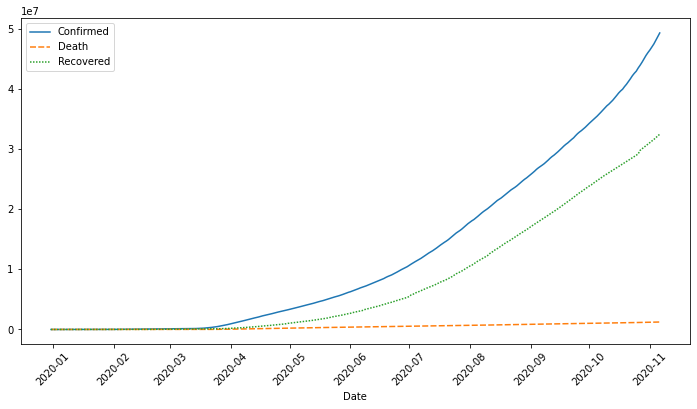

In [32]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.lineplot(data=date_status)

# 전세계 코로나 바이러스 감염 지도 표시 - folium 라이브러리 소개 및 설명

### folium 사용해보기

In [ ]:
folium.Map()

### folium으로 서울 지도 표시하기

In [ ]:
# 서울지도 표시
folium.Map(location= [37.5642135,127.0016985])

### zoom 조절하기

In [ ]:
folium.Map(location= [37.5642135,127.0016985], zoom_start=16)

### CircleMarker 그리기

In [ ]:
m = folium.Map(location= [37.5642135,127.0016985], zoom_start=16)
folium.CircleMarker([37.5642135,127.0016985], radius=100).add_to(m) # 서울지도 m에 circlemarker 추가
m 

### CircleMarker 색상, 채우기, 채우기 색상 설정

In [ ]:
m = folium.Map(location= [37.5642135,127.0016985], zoom_start=16)
folium.CircleMarker([37.5642135,127.0016985], radius=100, color='red', fill=True, fill_color='red').add_to(m)
m 

### CircleMarker로 popup 표시

In [49]:
m = folium.Map(location= [37.5642135,127.0016985], zoom_start=16)
folium.CircleMarker([37.5642135,127.0016985], radius=100, color='red', fill=True, fill_color='red', popup='hi').add_to(m)
m 

#전세계 코로나 바이러스 감염 지도 표시 - 전세계 코로나 바이러스 감염 지도 시각화

### 국가별 최신 확진자 데이터 조회

In [45]:
latestDF

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
10673,29010,Afghanistan,2020-11-06,41975,1554,34440,40,0,0
10905,58010,Albania,2020-11-06,23210,549,11861,489,6,165
11137,87010,Algeria,2020-11-06,60800,2024,41510,631,13,266
11369,11601,Andorra,2020-11-06,5135,75,3858,0,0,0
11601,14501,Angola,2020-11-06,12223,300,5626,121,1,276
...,...,...,...,...,...,...,...,...,...
53593,53940,West Bank and Gaza,2020-11-06,57226,511,49537,554,3,857
53825,54230,Western Sahara,2020-11-06,10,1,8,0,0,0
54057,54520,Yemen,2020-11-06,2067,602,1375,4,1,0
54289,54810,Zambia,2020-11-06,16819,349,15862,49,0,35


### 지도에 전세계 국가별 확진자 수 CircleMarker로 표시

In [ ]:
# # 확진자 수에 따라 원이 표시되게
# m = folium.Map(location= [0,0], zoom_start=2)
# for n in latestDF.index:
#     folium.CircleMarker([latestDF['Lat'][n], latestDF['Long'][n]], radius = int(latestDF['Confirmed'][n]/1000)
#     , color='red', fill="True", fill_color='red', popup=latestDF['Country'][n] + ":" + str(latestDF['Confirmed'][n])).add_to(m)
# m